# Auxiliar 2: Ejemplos de regresiones

*Por: Benjamín Vera*

In [6]:
import numpy as np
from matplotlib import pyplot as plt

## Estimación de mínimos cuadrados recursiva

Considere que se dispone de un tanque con concentraciones iniciales $x_1, x_2$ de dos compuestos químicos. Se busca conocer estas concentraciones iniciales a partir de una serie de mediciones. Consiere que estas se realizan cada minuto y se sabe que pasado este tiempo, el $1\%$ del químico 2 se descompone. Las mediciones solo pueden percibir la suma de las dos concentraciones, por lo que se tiene la ecuación:
$$y_k = x_1 + (0.99)^k x_2 + v_k$$
En que $v_k$ es el ruido de medicion con varianza $R = 0.01$.

Suponga que los valores reales son $x_1 = 10, x_2 = 5$ con estimaciones iniciales $\hat{x}_1 = 8$, $\hat{x}_2 = 7$ con matriz de varianzas inicial $P_0 = I_2$. Implementar la estimación de mínimos cuadrados recursiva estudiada en la clase auxiliar.

In [7]:
N = 70  # número de mediciones a simular.
x_true = np.array([10, 5])  # Valores verdaderos (2,)

x = [np.array([8, 7], dtype=float)]  # x_k: (2,)
P = [np.eye(2)]  # (2, 2)
R = 0.01  # escalar

for k in range(1, N):
    # Construir el experimento H y obtener el resultado simulado
    H = np.array([1, 0.99**k]).reshape((1, 2))  # (1, 2)
    y = (H @ x_true).item()  + np.random.normal(loc=0, scale=np.sqrt(R))

    # Obtener x_prev (columna) y P_prev
    x_prev = x[k-1].reshape((-1, 1))  # (2, 1)
    P_prev = P[k-1]  # (2, 2)

    # Calcular K de acuerdo a la identidad
    den = (H @ P[k-1] @ H.T +  R).item()
    K = P_prev @ H.T / den  # (2, 1)

    # Actualizar el estimador de acuerdo a K
    x_new = x_prev + K * (y -  H @ x_prev).item()
    x.append( x_new.flatten() )

    # Actualizar P
    KH = K @ H  # (2, 1) @ (1, 2) = (2, 1)
    I = np.eye(2)
    P_new = (I - KH) @ P_prev @ (I - KH).T + (K @ K.T) * R
    P.append( P_new )


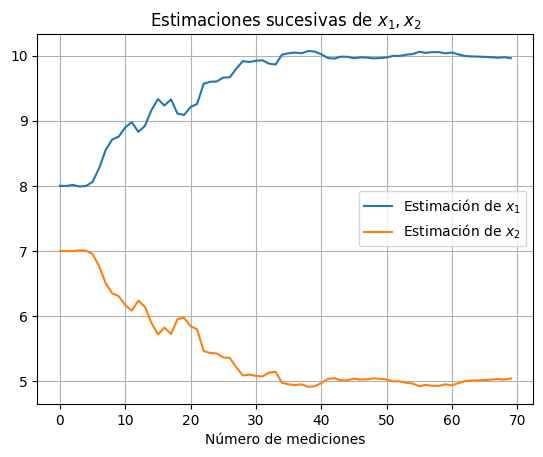

In [14]:
plt.plot(range(N), np.array(x)[:, 0], label="Estimación de $x_1$")
plt.plot(range(N), np.array(x)[:, 1], label="Estimación de $x_2$")
plt.legend()
plt.title("Estimaciones sucesivas de $x_1, x_2$")
plt.xlabel("Número de mediciones")
plt.grid()